In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(style='darkgrid', palette='deep')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (precision_score,
                             recall_score,
                             f1_score,
                             confusion_matrix,
                             classification_report,
                             ConfusionMatrixDisplay)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from scipy.stats import spearmanr, pearsonr
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from collections import Counter
from imblearn.combine import SMOTETomek
import warnings
warnings.filterwarnings('ignore')

path = "/content/drive/MyDrive/ML_Hillel/HW_L8_Trees_SVM/credit+approval/"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Зчитуємо датасет Credit Approval:
df_columns = ['A' + str(n+1) for n in range(16)]
df = pd.read_csv(path + 'crx.data', delimiter=',', names = df_columns)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


Таргетом є A16 (видано /не видано кредит).

Бачимо наче датасет без пропусків. Перевіримо детальніше

In [ ]:
print(df['A1'].value_counts())
print(df['A2'].value_counts())
print(df['A4'].value_counts())
print(df['A5'].value_counts())
print(df['A6'].value_counts())
print(df['A7'].value_counts())
print(df['A9'].value_counts())
print(df['A10'].value_counts())
print(df['A12'].value_counts())
print(df['A13'].value_counts())
print(df['A14'].value_counts())
print(df['A16'].value_counts())

A1
b    468
a    210
?     12
Name: count, dtype: int64
A2
?        12
22.67     9
20.42     7
18.83     6
24.50     6
         ..
48.25     1
28.33     1
18.75     1
18.50     1
36.42     1
Name: count, Length: 350, dtype: int64
A4
u    519
y    163
?      6
l      2
Name: count, dtype: int64
A5
g     519
p     163
?       6
gg      2
Name: count, dtype: int64
A6
c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
?       9
r       3
Name: count, dtype: int64
A7
v     399
h     138
bb     59
ff     57
?       9
j       8
z       8
dd      6
n       4
o       2
Name: count, dtype: int64
A9
t    361
f    329
Name: count, dtype: int64
A10
f    395
t    295
Name: count, dtype: int64
A12
f    374
t    316
Name: count, dtype: int64
A13
g    625
s     57
p      8
Name: count, dtype: int64
A14
00000    132
00200     35
00120     35
00160     34
00100     30
        ... 
00021      1
00393      1
00395      1
00093  

Але насправді пропуски є, тільки "заховались" у категорійних ознаках під "?". Тому видалимо рядки, в яких містяться значення '?'

In [ ]:
# Знаходимо індекси рядків, де є знак '?'
rows_to_drop = df[df.isin(['?']).any(axis=1)].index

# Видаляємо ці рядки
df_cleaned = df.drop(rows_to_drop)
# Оновлюємо індекси
df_cleaned = df_cleaned.reset_index(drop=True)
print(df_cleaned)

    A1     A2      A3 A4 A5  A6  A7    A8 A9 A10  A11 A12 A13    A14  A15 A16
0    b  30.83   0.000  u  g   w   v  1.25  t   t    1   f   g  00202    0   +
1    a  58.67   4.460  u  g   q   h  3.04  t   t    6   f   g  00043  560   +
2    a  24.50   0.500  u  g   q   h  1.50  t   f    0   f   g  00280  824   +
3    b  27.83   1.540  u  g   w   v  3.75  t   t    5   t   g  00100    3   +
4    b  20.17   5.625  u  g   w   v  1.71  t   f    0   f   s  00120    0   +
..  ..    ...     ... .. ..  ..  ..   ... ..  ..  ...  ..  ..    ...  ...  ..
648  b  21.08  10.085  y  p   e   h  1.25  f   f    0   f   g  00260    0   -
649  a  22.67   0.750  u  g   c   v  2.00  f   t    2   t   g  00200  394   -
650  a  25.25  13.500  y  p  ff  ff  2.00  f   t    1   t   g  00200    1   -
651  b  17.92   0.205  u  g  aa   v  0.04  f   f    0   f   g  00280  750   -
652  b  35.00   3.375  u  g   c   h  8.29  f   f    0   t   g  00000    0   -

[653 rows x 16 columns]


Отримали df_cleaned - очищений під пропущених значень датасет (збереглось 95% датасету, тому вважаємо, що цей метод очищення був прийнятний)

In [ ]:
#Описова статистика
df_cleaned.describe()

,A3,A8,A11,A15
count,653.000000,653.000000,653.000000,653.000000
mean,4.829533,2.244296,2.502297,1013.761103
std,5.027077,3.371120,4.968497,5253.278504
min,0.000000,0.000000,0.000000,0.000000
25%,1.040000,0.165000,0.000000,0.000000
50%,2.835000,1.000000,0.000000,5.000000
75%,7.500000,2.625000,3.000000,400.000000
max,28.000000,28.500000,67.000000,100000.000000


За результатами описової статистики видно, що числові значення потребують масштабування.

Але спочатку переведемо фактичні числові ознаки (A2, A14 - згідно опису датасету) у числові типи, і закодуємо категорійні фічі

In [ ]:
df_cleaned['A2'] = df_cleaned['A2'].astype('float64')
df_cleaned['A14'] = df_cleaned['A14'].astype('float64')

In [ ]:
df_cleaned

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
649,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
650,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
651,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [ ]:
# Використаємо OneHotEncoder для кодування категорійних змінних

# Ініціалізуємо OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # sparse=False повертає масив замість sparse-матриці

# Перетворюємо лише категорійні колонки
categorical_columns = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

# Застосовуємо OneHotEncoder
encoded_data = encoder.fit_transform(df_cleaned[categorical_columns])

# Отримуємо назви нових колонок
encoded_columns = encoder.get_feature_names_out(categorical_columns)

# Створюємо DataFrame з кодуванням
df_encoded_categ = pd.DataFrame(encoded_data, columns=encoded_columns)

# Об'єднуємо з числовими колонками
df_encoded = pd.concat([df_encoded_categ, df_cleaned.drop(columns=categorical_columns)], axis=1)

print(df_encoded.shape)

(653, 47)


У результаті утворився датасет з 47 ознаками

In [ ]:
#Переведемо значення таргету в числове
df_encoded['A16'] = df_encoded['A16'].replace({'+': 1, '-': 0})

print(df_encoded)

     A1_a  A1_b  A4_l  A4_u  A4_y  A5_g  A5_gg  A5_p  A6_aa  A6_c  ...  A13_g  \
0     0.0   1.0   0.0   1.0   0.0   1.0    0.0   0.0    0.0   0.0  ...    1.0   
1     1.0   0.0   0.0   1.0   0.0   1.0    0.0   0.0    0.0   0.0  ...    1.0   
2     1.0   0.0   0.0   1.0   0.0   1.0    0.0   0.0    0.0   0.0  ...    1.0   
3     0.0   1.0   0.0   1.0   0.0   1.0    0.0   0.0    0.0   0.0  ...    1.0   
4     0.0   1.0   0.0   1.0   0.0   1.0    0.0   0.0    0.0   0.0  ...    0.0   
..    ...   ...   ...   ...   ...   ...    ...   ...    ...   ...  ...    ...   
648   0.0   1.0   0.0   0.0   1.0   0.0    0.0   1.0    0.0   0.0  ...    1.0   
649   1.0   0.0   0.0   1.0   0.0   1.0    0.0   0.0    0.0   1.0  ...    1.0   
650   1.0   0.0   0.0   0.0   1.0   0.0    0.0   1.0    0.0   0.0  ...    1.0   
651   0.0   1.0   0.0   1.0   0.0   1.0    0.0   0.0    1.0   0.0  ...    1.0   
652   0.0   1.0   0.0   1.0   0.0   1.0    0.0   0.0    0.0   1.0  ...    1.0   

     A13_p  A13_s     A2   

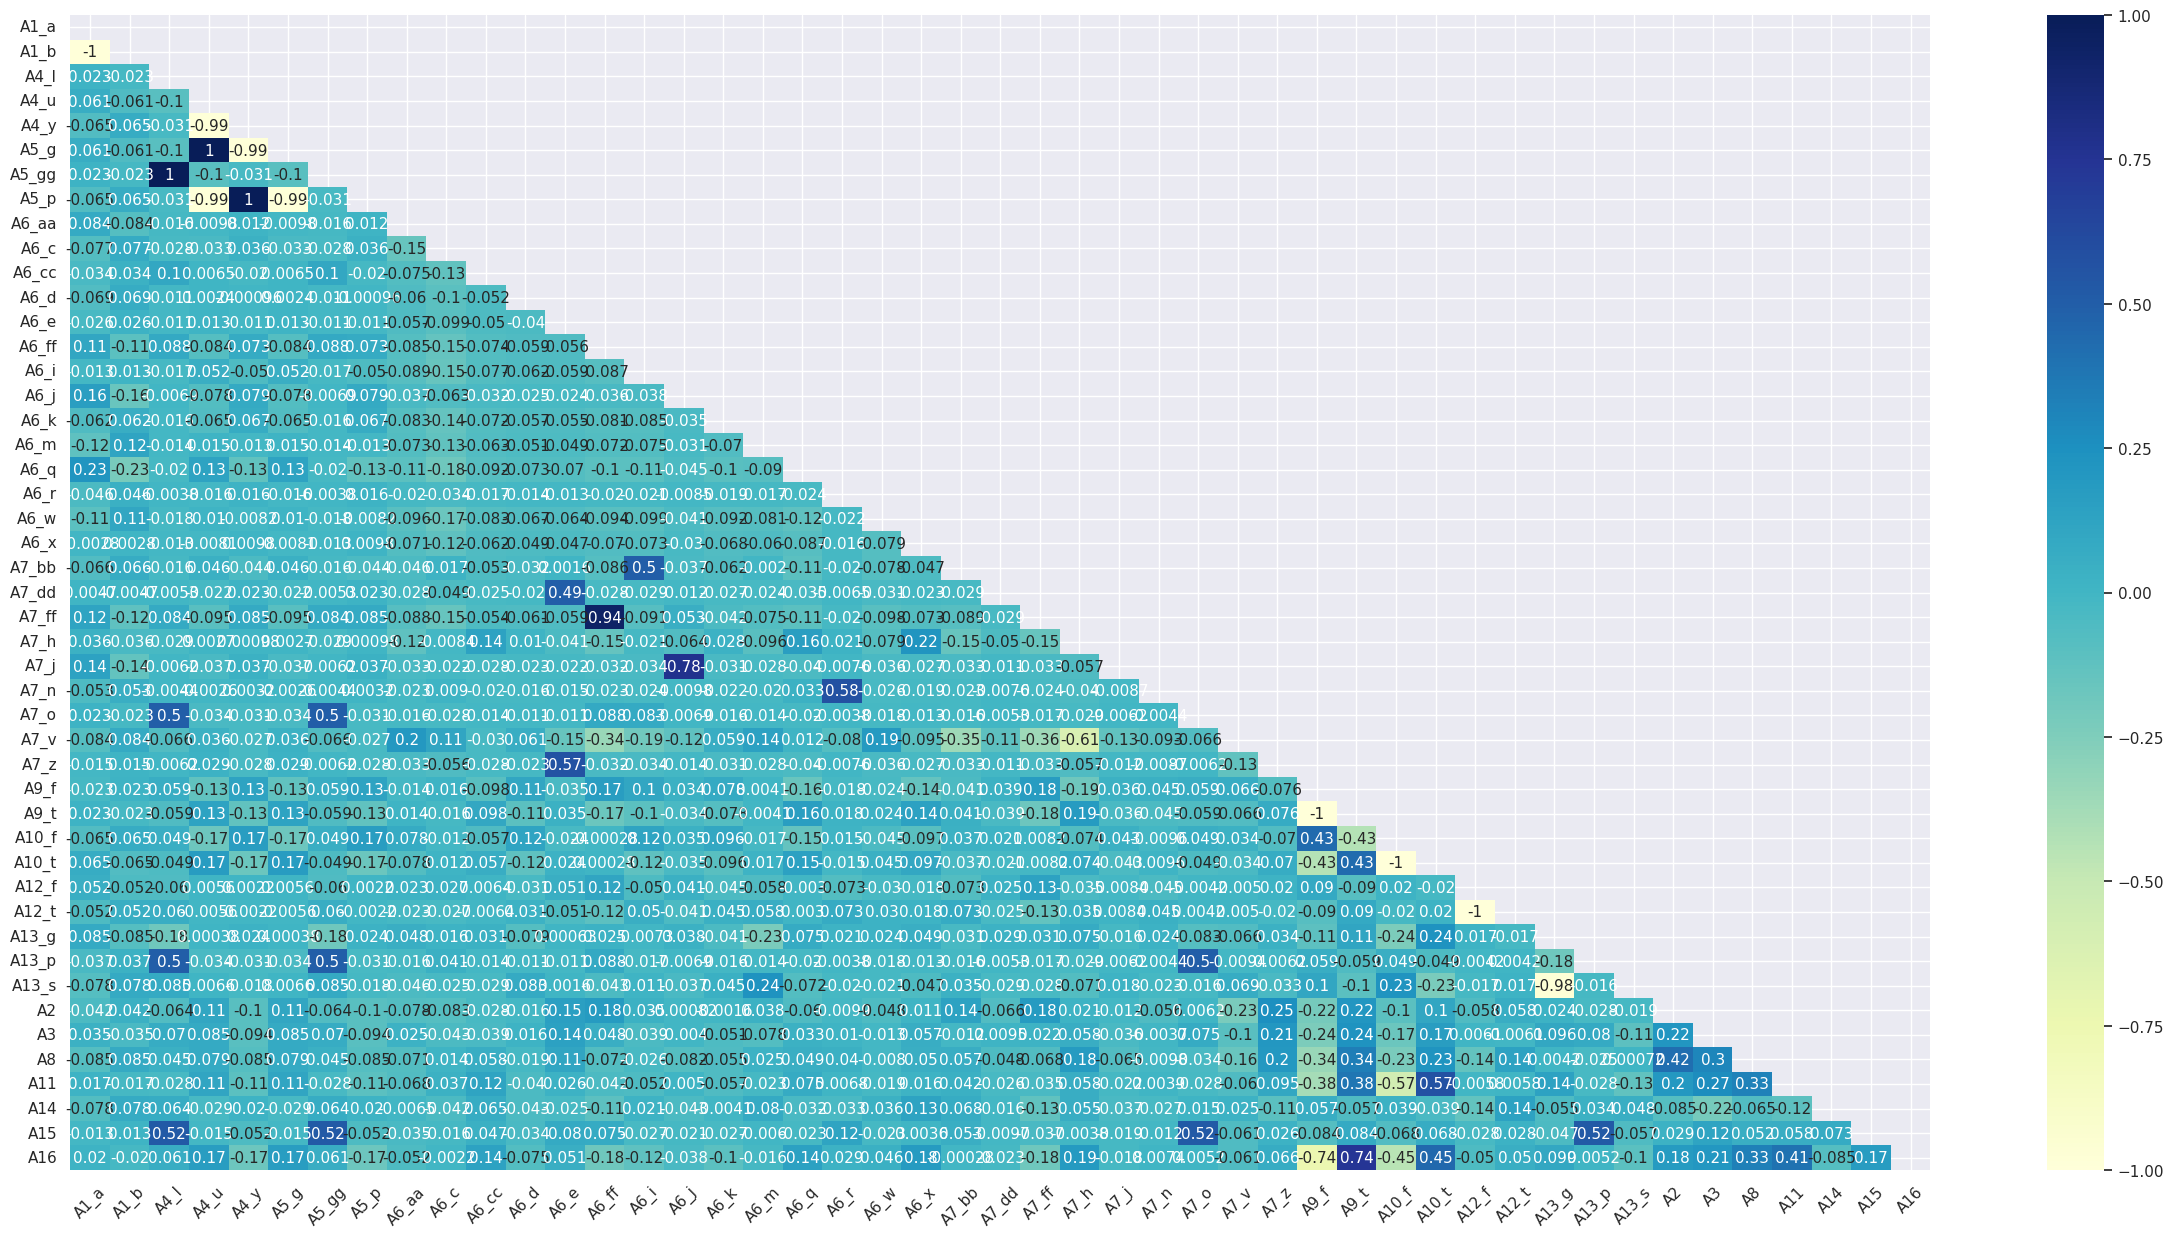

In [ ]:
# Побудуємо матрицю кореляцій для датасету за допомогою heatmap:
corr_matrix = df_encoded.corr()

plt.figure(figsize=(30, 15))

# Для зручності сприйняття створимо маску для правої верхньої частини матриці:
mask = np.triu(corr_matrix)

# Створимо теплову карту з врахуванням маски:
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, annot_kws={"fontsize":11}, mask=mask)
plt.xticks(rotation=45)
plt.show()

Виявлено ряд високих кореляцій: очевидні - для бінарних ознак, і не зовсім очевидні (A5_g i A4_u, A5_p i A4_u, A4_y, A5_p), а також взаємозв'язок із змінною target, для прикладу, якщо значення колонки A9 = t, то таргет буде скоріш за все '+', якщо значення колонки A9 = f, то таргет буде скоріш за все '-'. При потребі, можна буде видалити фічі, які сильно між собою корелюють, або слабко корелюють з таргетом

Проведемо масштабування змінних

In [ ]:
#Стандартизація значень

#Назви ознак
df_columns_scaled = list(df_encoded.columns)
df_columns_scaled.remove('A16')

#Масштабування згідно StandardScaler
sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df_encoded.drop(columns='A16')), columns = df_columns_scaled)

X = df_scaled.copy()
y = df_encoded['A16']


# Об'єднуємо з таргетом
df_scaled = pd.concat([X, y], axis = 1)

df_scaled

,A1_a,A1_b,A4_l,A4_u,A4_y,A5_g,A5_gg,A5_p,A6_aa,A6_c,...,A13_g,A13_p,A13_s,A2,A3,A8,A11,A14,A15,A16
0,-0.671648,0.671648,-0.055427,0.555533,-0.550811,0.555533,-0.055427,-0.550811,-0.294147,-0.505736,...,0.303271,-0.055427,-0.297209,-0.056962,-0.961440,-0.295171,-0.302596,0.128682,-0.193125,1
1,1.488875,-1.488875,-0.055427,0.555533,-0.550811,0.555533,-0.055427,-0.550811,-0.294147,-0.505736,...,0.303271,-0.055427,-0.297209,2.296536,-0.073565,0.236217,0.704516,-0.816802,-0.086443,1
2,1.488875,-1.488875,-0.055427,0.555533,-0.550811,0.555533,-0.055427,-0.550811,-0.294147,-0.505736,...,0.303271,-0.055427,-0.297209,-0.592078,-0.861903,-0.220955,-0.504019,0.592504,-0.036150,1
3,-0.671648,0.671648,-0.055427,0.555533,-0.550811,0.555533,-0.055427,-0.550811,-0.294147,-0.505736,...,0.303271,-0.055427,-0.297209,-0.310572,-0.654865,0.446990,0.503093,-0.477855,-0.192553,1
4,-0.671648,0.671648,-0.055427,0.555533,-0.550811,0.555533,-0.055427,-0.550811,-0.294147,-0.505736,...,-3.297382,-0.055427,3.364633,-0.958122,0.158358,-0.158613,-0.504019,-0.358926,-0.193125,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,-0.671648,0.671648,-0.055427,-1.800072,1.815503,-1.800072,-0.055427,1.815503,-0.294147,-0.505736,...,0.303271,-0.055427,-0.297209,-0.881193,1.046233,-0.295171,-0.504019,0.473575,-0.193125,0
649,1.488875,-1.488875,-0.055427,0.555533,-0.550811,0.555533,-0.055427,-0.550811,-0.294147,1.977315,...,0.303271,-0.055427,-0.297209,-0.746780,-0.812134,-0.072523,-0.101174,0.116789,-0.118066,0
650,1.488875,-1.488875,-0.055427,-1.800072,1.815503,-1.800072,-0.055427,1.815503,-0.294147,-0.505736,...,0.303271,-0.055427,-0.297209,-0.528676,1.726075,-0.072523,-0.302596,0.116789,-0.192934,0
651,-0.671648,0.671648,-0.055427,0.555533,-0.550811,0.555533,-0.055427,-0.550811,3.399661,-0.505736,...,0.303271,-0.055427,-0.297209,-1.148329,-0.920630,-0.654378,-0.504019,0.592504,-0.050247,0


Застосуємо по черзі базові варіації логістичної регресії, методу найближчих сусідів та дерева рішень та порівняємо їх.

In [ ]:
# Ділимо вибірку на тренувальну і тестову
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

# Логістична регресія

In [ ]:
# Навчимо та застосуємо логістичну регресію:

LogReg = LogisticRegression(random_state=17)
LogReg.fit(X_train, y_train)

#Прогнозування моделі
y_pred = LogReg.predict(X_test)

#Вивід значень оцінок моделі
print('Accuracy:', round(accuracy_score(y_test, y_pred) * 100, 4))
print('Precision:', round(precision_score(y_test, y_pred) *100, 4))
print('Recall:', round(recall_score(y_test, y_pred) *100, 4))
print('F1', round(f1_score(y_test, y_pred)*100, 4))

Accuracy: 86.5854
Precision: 82.0225
Recall: 92.4051
F1 86.9048


Text(0.5, 32.249999999999986, 'Predicted Values')

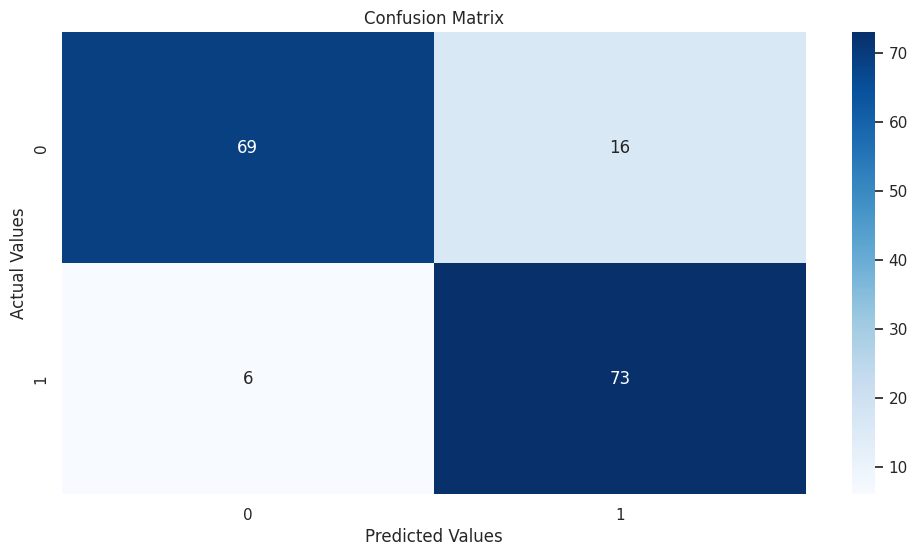

In [ ]:
#Побудуємо матрицю помилок (Confusion matrix)
cm_LogReg=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,6))
plt.title('Confusion Matrix')
sns.heatmap(cm_LogReg, annot=True,fmt='d', cmap='Blues')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

Як бачимо, логістична регресія показала високий рівень точності (Precision=0.82)

# kNN (K nearest neighbors)

In [ ]:
#KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

#Прогнозування моделі
y_pred = knn_model.predict(X_test)

#Вивід значень оцінок моделі
print('Accuracy:', round(accuracy_score(y_test, y_pred) * 100, 4))
print('Precision:', round(precision_score(y_test, y_pred) *100, 4))
print('Recall:', round(recall_score(y_test, y_pred) *100, 4))
print('F1', round(f1_score(y_test, y_pred)*100, 4))

Accuracy: 79.2683
Precision: 78.481
Recall: 78.481
F1 78.481


Text(0.5, 32.249999999999986, 'Predicted Values')

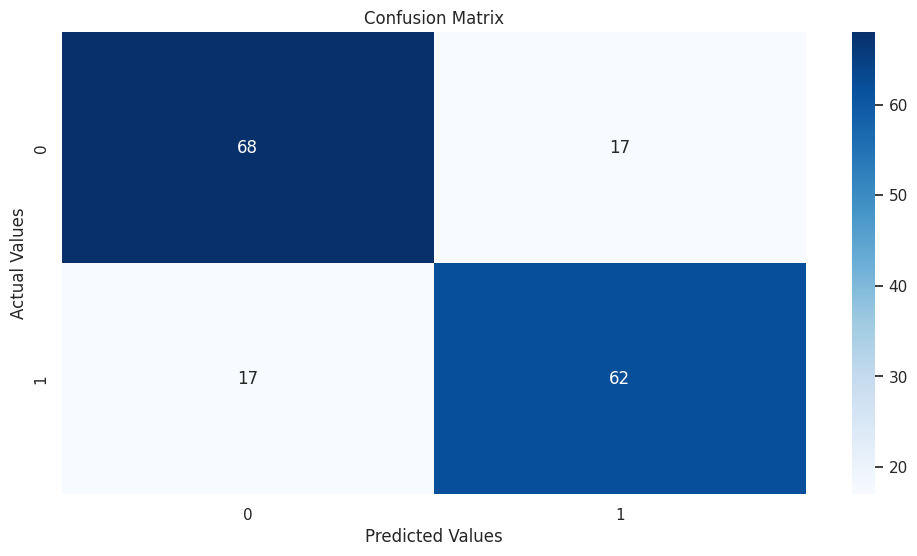

In [ ]:
#Побудуємо матрицю помилок (Confusion matrix)
cm_knn=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,6))
plt.title('Confusion Matrix')
sns.heatmap(cm_knn, annot=True,fmt='d', cmap='Blues')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

Як бачимо, метод найближчих сусідів показав гіршу оцінку (Precision = 0.78), ніж логістична регресія

#Дерево рішень

In [ ]:
#Побудова моделі "Дерево рішень"
tree_clf = DecisionTreeClassifier(random_state = 17)
tree_clf = tree_clf.fit(X_train, y_train)

#Прогнозування моделі
y_pred = tree_clf.predict(X_test)

#Вивід значень оцінок моделі
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))

Accuracy: 0.8353658536585366
Precision: 0.8333333333333334
Recall: 0.8227848101265823
F1: 0.8280254777070064


Text(0.5, 32.249999999999986, 'Predicted Values')

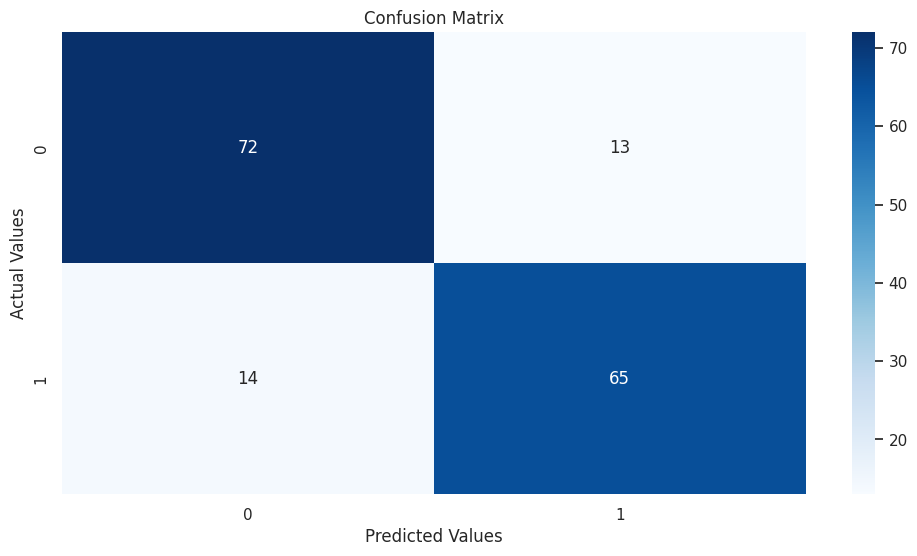

In [ ]:
#Візуалізуємо матрицю помилок (Confusion matrix)
cm_tree_clf=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,6))
plt.title('Confusion Matrix')
sns.heatmap(cm_tree_clf, annot=True,fmt='d', cmap='Blues')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

Висновки: з трьох моделей найкращі результати для датасету (в частині показника Precision, який є найважливішим для кредитного скорингу), показали дерева рішень (Precision = 0.83) , трохи гірший - логістична регресія (Precision=0.82), і найгіршу оцінку показав метод найближчих сусідів (Precision = 0.78)

Продовжимо аналіз для моделі дерева рішення

Підберемо оптимальні параметри для моделі через GridSearchCV

In [ ]:
#GridSearchCV

param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': range(3, 9),
              'min_samples_split': range(2, 5),
              'min_samples_leaf': range(1, 5),
              'max_features': [None, 'sqrt', 'log2']}

tree_clf = DecisionTreeClassifier(random_state = 17)

tree_clf_grid = GridSearchCV(estimator=tree_clf,
                                 param_grid=param_grid,
                                 scoring='precision',
                                 cv=5,
                                 error_score="raise")
tree_clf_grid.fit(X_train, y_train)


print('Найкращі параметри моделі:', tree_clf_grid.best_params_)

best_model = tree_clf_grid.best_estimator_


#Прогнозування моделі
y_pred = best_model.predict(X_test)

#Вивід значень оцінок моделі
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))


Найкращі параметри моделі: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4}
Accuracy: 0.8597560975609756
Precision: 0.868421052631579
Recall: 0.8354430379746836
F1: 0.8516129032258064


Отже, найкраща модель дерева вийшла за такими параметрами:

*   критерій розбиття 'criterion': 'gini'

*   найбільша глибина дерева 'max_depth': 7
*   кількість фіч для розгляду 'max_features': 'sqrt' (у даному випадку - 7)
*   мінімальна кількість зразків у листку 'min_samples_leaf': 1
*   мінімальна кількість зразків для розбиття внутрішнього вузла 'min_samples_split': 4

Зверну увагу, що при великому max_depth модель швидко перенавчалась, і оцінки її на тестовій вибарці ставали гіршими. Тому варіанти параметру прийшлось обмежити зверху значенням 7. Тепер, зафіксувавши інші оптимальні параметри, проведем аналіз по параметру max_depth

Text(0.5, 32.249999999999986, 'Predicted Values')

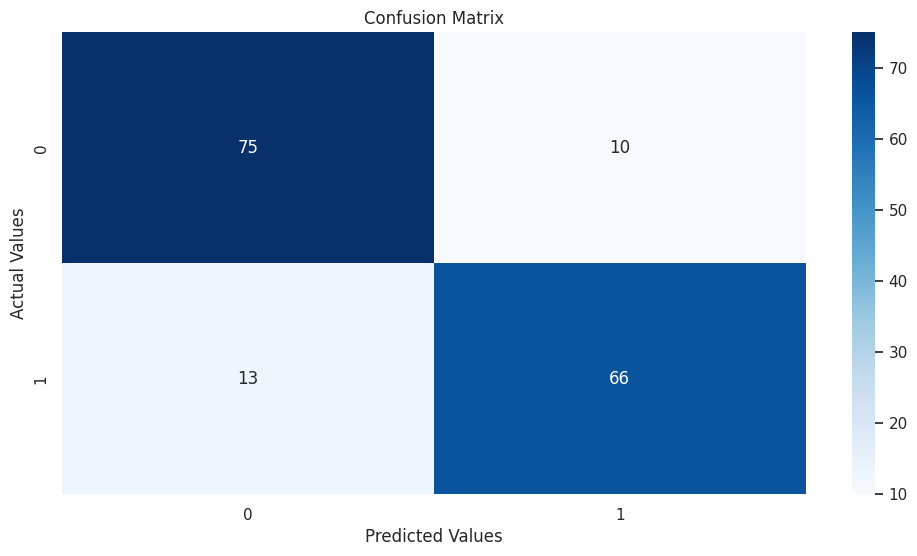

In [ ]:
#Візуалізуємо матрицю помилок (Confusion matrix) для найкращої моделі
cm_best_tree_clf=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,6))
plt.title('Confusion Matrix')
sns.heatmap(cm_best_tree_clf, annot=True,fmt='d', cmap='Blues')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

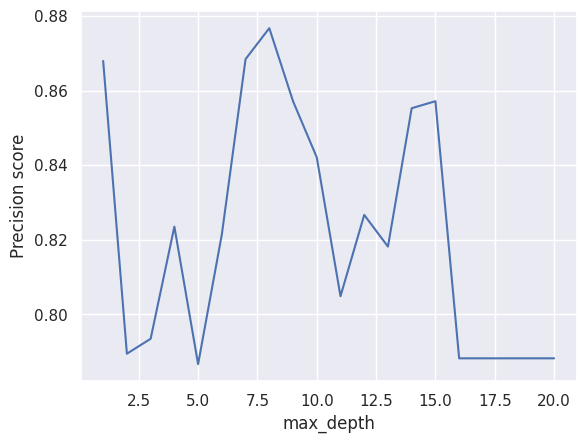

In [ ]:
#Підбір оптимального значення max_depth для моделі
pres_scores = []
for max_depth in range(1, 21):
  best_model_maxd = DecisionTreeClassifier(random_state = 17,
                                         max_depth=max_depth,
                                         criterion='gini',
                                         max_features='sqrt',
                                         min_samples_leaf=1,
                                         min_samples_split=4)
  best_model_maxd.fit(X_train, y_train)
  y_pred = best_model_maxd.predict(X_test)
  pres_scores.append(precision_score(y_test, y_pred))

plt.plot(list(range(1, 21)), pres_scores)
plt.xlabel('max_depth')
plt.ylabel('Precision score')
plt.show()


Тепер на основі графіка функції Precision score від max_depth бачимо, що оптимальніше значення max_depth=8. Перевіримо це

In [ ]:
best_model_maxd8 = DecisionTreeClassifier(random_state = 17,
                                         max_depth=8,
                                         criterion='gini',
                                         max_features='sqrt',
                                         min_samples_leaf=1,
                                         min_samples_split=4)
best_model_maxd8.fit(X_train, y_train)
y_pred = best_model_maxd8.predict(X_test)

#Вивід значень оцінок моделі
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))

Accuracy: 0.8536585365853658
Precision: 0.8767123287671232
Recall: 0.810126582278481
F1: 0.8421052631578947


Саме так і є: значення Precision зросло до 0.8767

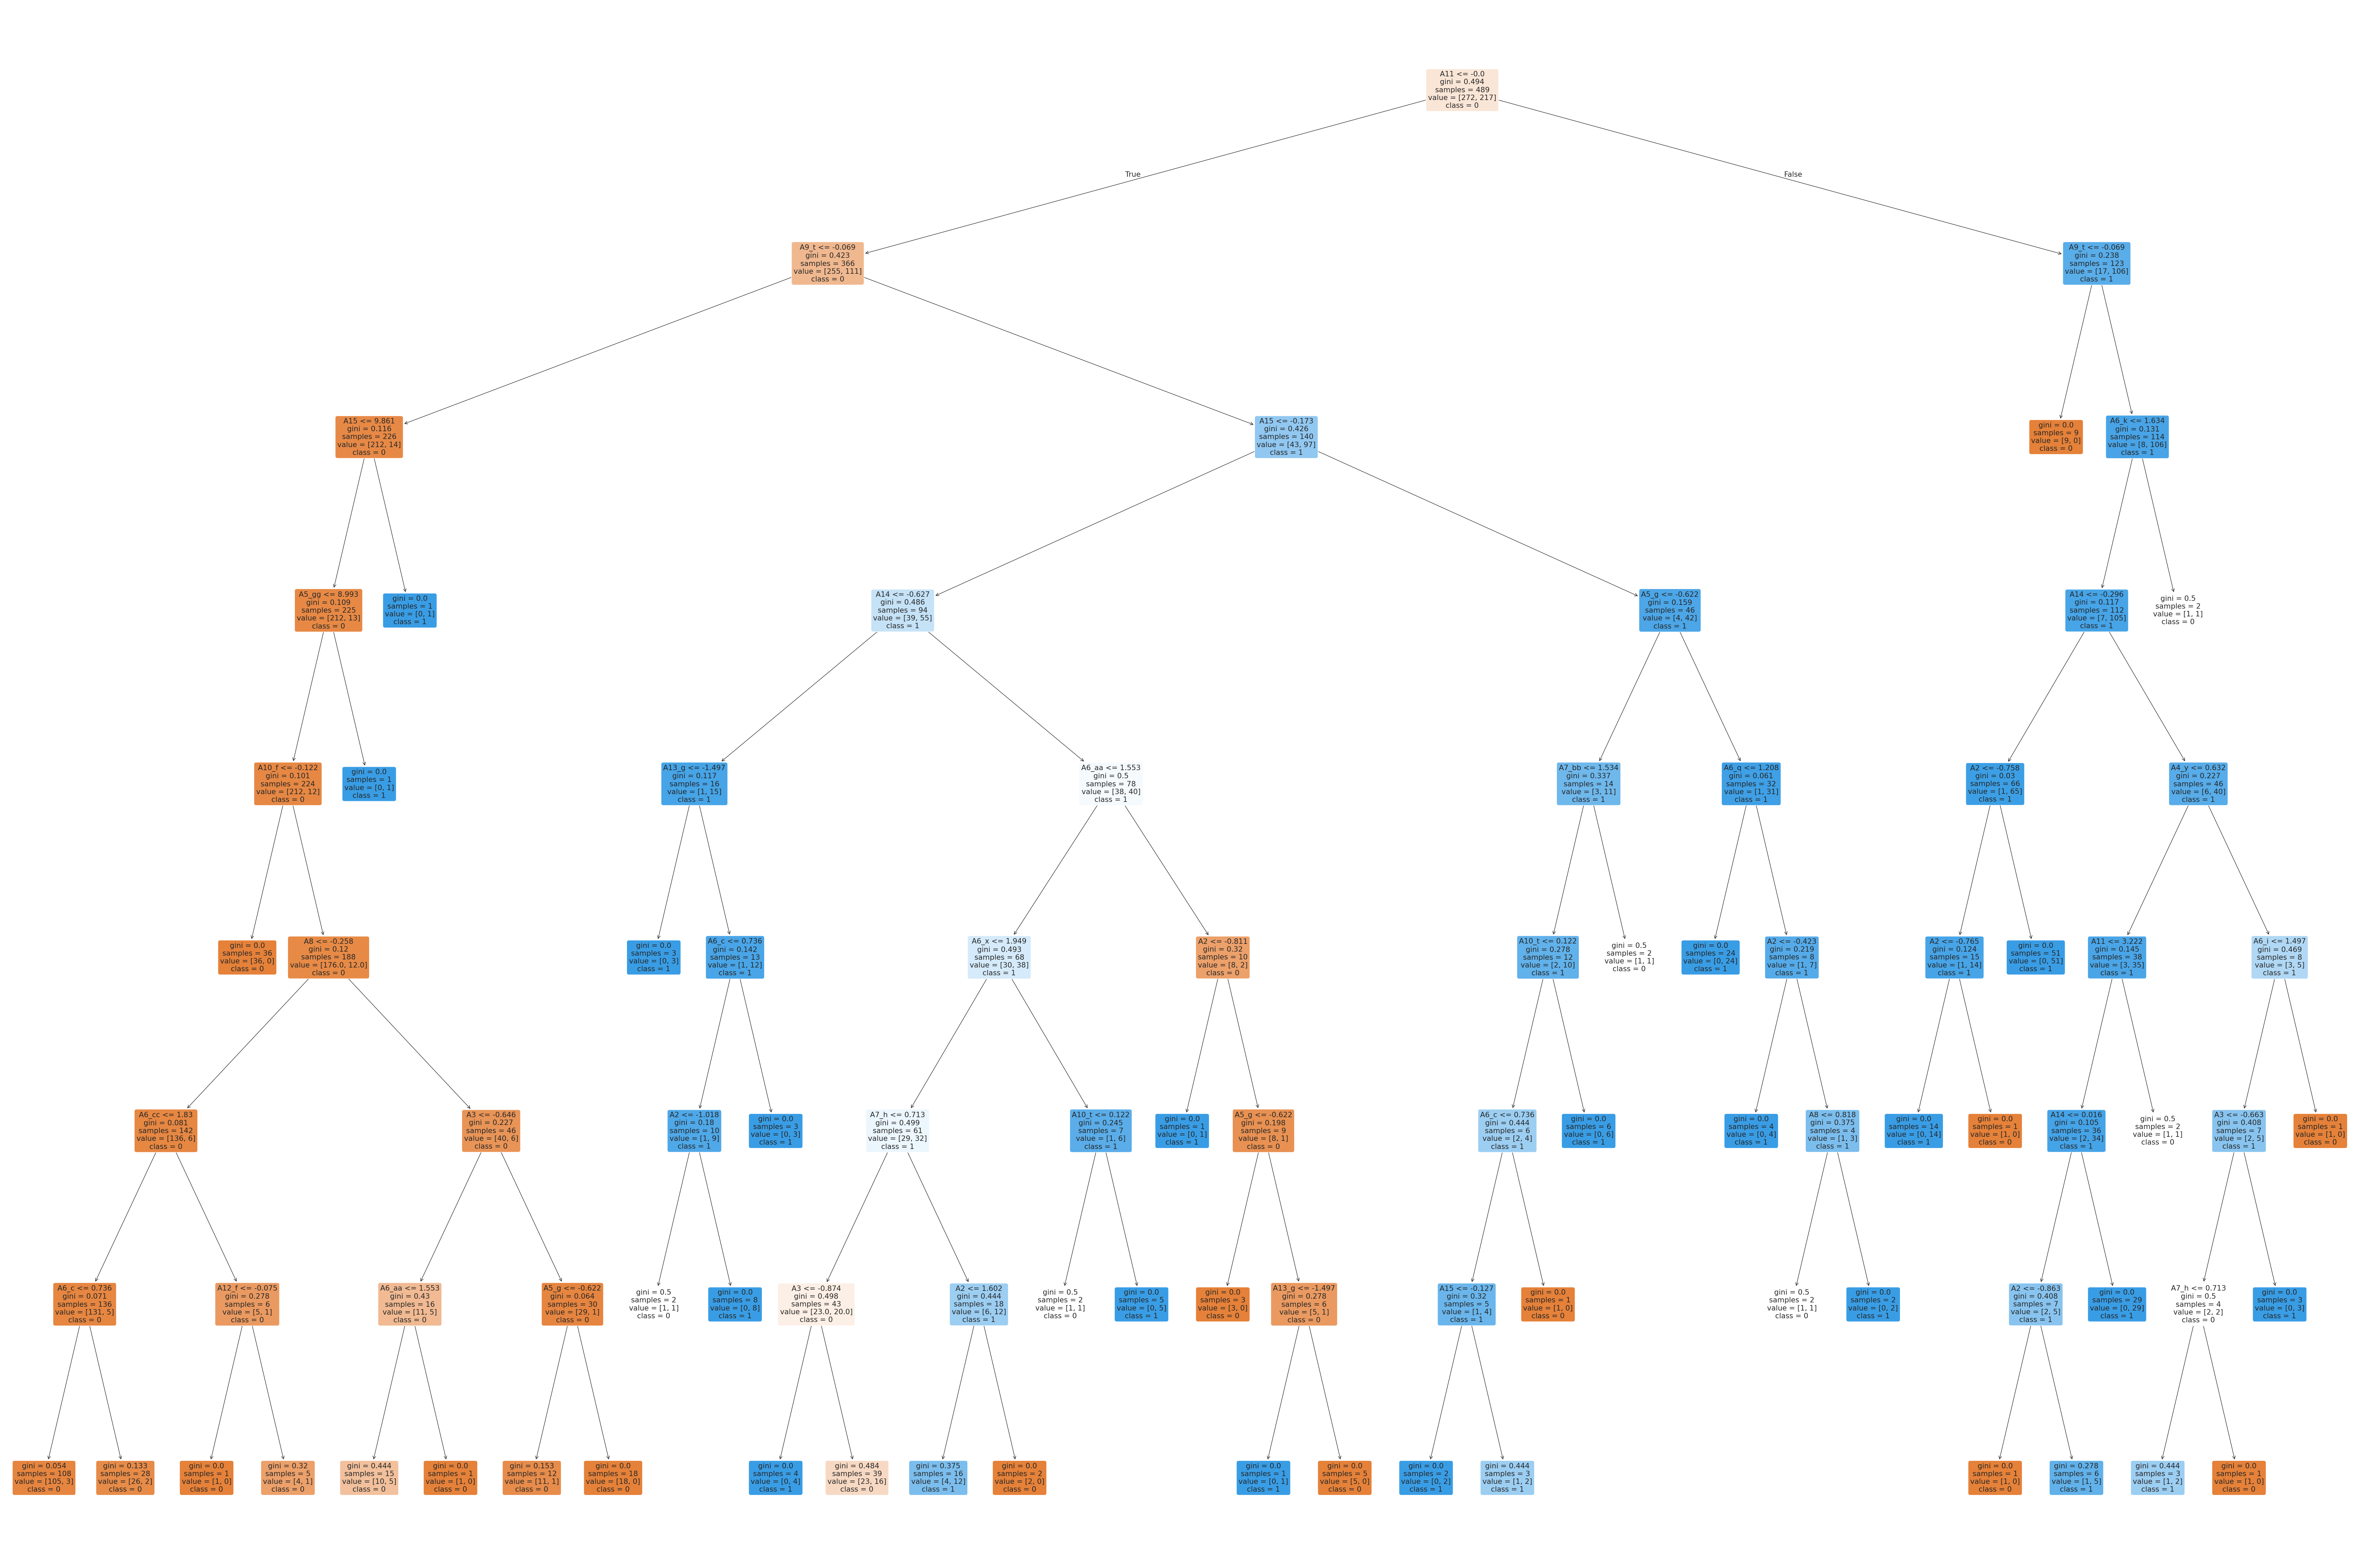

In [ ]:
#Побудова дерева
plt.figure(figsize = ((90,60)))
plot_tree(best_model_maxd8,
          filled = True,
          feature_names = X_train.columns.values[:],
          class_names = ['0', '1'],
          rounded = True)
plt.show()

Було проведено аналіз датасету, очищення даних, масштабування, побудову трьох моделей та порівняння їх характеристик, підбір параметрів для дерева рішень через GridSearchCV та вручну, та візуалізацію оптимальної моделі дерева рішень